#### 모듈 호출하기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
path = "./data"
file_list = os.listdir(path)

print("file_list: {}".format(file_list))


file_list: ['codeBook_v3.xlsx', 'crime.csv', 'KP2020.csv', 'KP2021.csv', 'NPA2020.csv']


#### crime 파일 불러오기

In [4]:
crime = pd.read_csv('./data/crime.csv')
crime

<ipython-input-4-f19acc543c96>:1: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('./data/crime.csv')


,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소
0,충남청,2020-12-01 01:43:07,충남청,종결요청,주취자,남성,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y,NaN
1,대전청,2020-12-01 02:05:04,대전청,종결요청,내용확인불가,불상,NaN,127.404663,36.341685,NaN,NaN
2,대전청,2020-12-01 02:06:52,대전청,종결요청,내용확인불가,남성,NaN,127.404663,36.341685,NaN,NaN
3,충남청,2020-12-01 02:37:25,충남청,종결요청,기타_타기관,불상,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N,NaN
4,충남청,2020-12-01 08:17:50,충남청,종결요청,교통사고,여성,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3849376,충남청,2020-11-22 00:35:05,충남청,종결요청,상담문의,남성,NaN,NaN,NaN,,
3849377,대전청,2020-11-22 00:52:13,대전청,종결요청,내용확인불가,불상,NaN,127.404663,36.341685,,
3849378,충남청,2020-11-22 00:46:27,충남청,종결요청,내용확인불가,남성,NaN,NaN,NaN,Y,
3849379,충남청,2020-11-22 00:52:46,충남청,도착,시비,남성,NaN,126.516040,36.305619,,충청남도 보령시 신흑동(행정:대천5동)


In [5]:
crime.shape

(3849381, 11)

#### 보이스피싱 데이터 추출 및 EDA

In [6]:
voice_fishing = crime[crime['사건종별코드'] == '보이스피싱']
voice_fishing

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소
333,충남청,2020-12-01 15:06:38,충남청,종결요청,보이스피싱,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN,NaN
360,충남청,2020-12-01 14:53:20,충남청,종결요청,보이스피싱,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN,NaN
367,충남청,2020-12-01 11:15:43,충남청,종결요청,보이스피싱,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN,NaN
372,충남청,2020-12-01 13:08:09,충남청,종결요청,보이스피싱,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN,NaN
375,충남청,2020-12-01 14:00:07,충남청,종결요청,보이스피싱,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3848968,충남청,2020-11-20 13:25:41,충남청,종결요청,보이스피싱,여성,NaN,NaN,NaN,,
3848982,충남청,2020-11-20 13:41:02,충남청,종결요청,보이스피싱,여성,NaN,126.933050,36.770739,,충청남도 아산시 신창면 읍내리(신창면) 646(V 순천향대학교)
3849046,대전청,2020-11-20 14:45:18,대전청,종결요청,보이스피싱,여성,NaN,127.427443,36.442072,,대전광역시 대덕구 덕암동(행정:덕암동) 14-4
3849055,충남청,2020-11-20 11:31:12,충남청,종결요청,보이스피싱,여성,NaN,126.516425,36.306058,,충청남도 보령시 신흑동(행정:대천5동) 1983


In [7]:
voice_fishing['접수완료일시'] = pd.to_datetime(voice_fishing['접수완료일시'].copy())

<ipython-input-7-8c03ba42d8b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_fishing['접수완료일시'] = pd.to_datetime(voice_fishing['접수완료일시'].copy())


In [9]:
voice_fishing['접수완료일시'].sort_values()


2677192   2020-01-02 09:33:49
2677246   2020-01-02 09:42:45
2676751   2020-01-02 10:23:29
2674760   2020-01-02 10:46:31
2676966   2020-01-02 11:00:20
                  ...        
2643240   2023-01-18 12:44:04
2658153   2023-01-18 13:31:19
2670687   2023-01-18 16:17:02
2660036   2023-01-18 18:38:01
2623699   2023-01-18 19:48:01
Name: 접수완료일시, Length: 46268, dtype: datetime64[ns]

In [10]:
voice_phishing = voice_fishing.sort_values(by='접수완료일시')

In [11]:
voice_fishing = voice_fishing.reset_index(drop=True)

In [12]:
voice_fishing

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소
0,충남청,2020-12-01 15:06:38,충남청,종결요청,보이스피싱,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN,NaN
1,충남청,2020-12-01 14:53:20,충남청,종결요청,보이스피싱,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN,NaN
2,충남청,2020-12-01 11:15:43,충남청,종결요청,보이스피싱,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN,NaN
3,충남청,2020-12-01 13:08:09,충남청,종결요청,보이스피싱,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN,NaN
4,충남청,2020-12-01 14:00:07,충남청,종결요청,보이스피싱,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
46263,충남청,2020-11-20 13:25:41,충남청,종결요청,보이스피싱,여성,NaN,NaN,NaN,,
46264,충남청,2020-11-20 13:41:02,충남청,종결요청,보이스피싱,여성,NaN,126.933050,36.770739,,충청남도 아산시 신창면 읍내리(신창면) 646(V 순천향대학교)
46265,대전청,2020-11-20 14:45:18,대전청,종결요청,보이스피싱,여성,NaN,127.427443,36.442072,,대전광역시 대덕구 덕암동(행정:덕암동) 14-4
46266,충남청,2020-11-20 11:31:12,충남청,종결요청,보이스피싱,여성,NaN,126.516425,36.306058,,충청남도 보령시 신흑동(행정:대천5동) 1983


In [13]:
voice_fishing['접수완료일시_연'] = voice_fishing['접수완료일시'].dt.year
voice_fishing['접수완료일시_월'] = voice_fishing['접수완료일시'].dt.month
voice_fishing['접수완료일시_일'] = voice_fishing['접수완료일시'].dt.day
voice_fishing['접수완료일시_요일'] = voice_fishing['접수완료일시'].dt.dayofweek
voice_fishing['접수완료일시_시간'] = voice_fishing['접수완료일시'].dt.hour

In [14]:
voice_fishing

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소,접수완료일시_연,접수완료일시_월,접수완료일시_일,접수완료일시_요일,접수완료일시_시간
0,충남청,2020-12-01 15:06:38,충남청,종결요청,보이스피싱,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN,NaN,2020,12,1,1,15
1,충남청,2020-12-01 14:53:20,충남청,종결요청,보이스피싱,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN,NaN,2020,12,1,1,14
2,충남청,2020-12-01 11:15:43,충남청,종결요청,보이스피싱,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN,NaN,2020,12,1,1,11
3,충남청,2020-12-01 13:08:09,충남청,종결요청,보이스피싱,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN,NaN,2020,12,1,1,13
4,충남청,2020-12-01 14:00:07,충남청,종결요청,보이스피싱,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN,NaN,2020,12,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46263,충남청,2020-11-20 13:25:41,충남청,종결요청,보이스피싱,여성,NaN,NaN,NaN,,,2020,11,20,4,13
46264,충남청,2020-11-20 13:41:02,충남청,종결요청,보이스피싱,여성,NaN,126.933050,36.770739,,충청남도 아산시 신창면 읍내리(신창면) 646(V 순천향대학교),2020,11,20,4,13
46265,대전청,2020-11-20 14:45:18,대전청,종결요청,보이스피싱,여성,NaN,127.427443,36.442072,,대전광역시 대덕구 덕암동(행정:덕암동) 14-4,2020,11,20,4,14
46266,충남청,2020-11-20 11:31:12,충남청,종결요청,보이스피싱,여성,NaN,126.516425,36.306058,,충청남도 보령시 신흑동(행정:대천5동) 1983,2020,11,20,4,11


In [15]:
day_dict = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
voice_fishing['접수완료일시_요일'] = voice_fishing['접수완료일시_요일'].map(day_dict)


In [16]:
voice_fishing

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소,접수완료일시_연,접수완료일시_월,접수완료일시_일,접수완료일시_요일,접수완료일시_시간
0,충남청,2020-12-01 15:06:38,충남청,종결요청,보이스피싱,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN,NaN,2020,12,1,화,15
1,충남청,2020-12-01 14:53:20,충남청,종결요청,보이스피싱,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN,NaN,2020,12,1,화,14
2,충남청,2020-12-01 11:15:43,충남청,종결요청,보이스피싱,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN,NaN,2020,12,1,화,11
3,충남청,2020-12-01 13:08:09,충남청,종결요청,보이스피싱,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN,NaN,2020,12,1,화,13
4,충남청,2020-12-01 14:00:07,충남청,종결요청,보이스피싱,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN,NaN,2020,12,1,화,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46263,충남청,2020-11-20 13:25:41,충남청,종결요청,보이스피싱,여성,NaN,NaN,NaN,,,2020,11,20,금,13
46264,충남청,2020-11-20 13:41:02,충남청,종결요청,보이스피싱,여성,NaN,126.933050,36.770739,,충청남도 아산시 신창면 읍내리(신창면) 646(V 순천향대학교),2020,11,20,금,13
46265,대전청,2020-11-20 14:45:18,대전청,종결요청,보이스피싱,여성,NaN,127.427443,36.442072,,대전광역시 대덕구 덕암동(행정:덕암동) 14-4,2020,11,20,금,14
46266,충남청,2020-11-20 11:31:12,충남청,종결요청,보이스피싱,여성,NaN,126.516425,36.306058,,충청남도 보령시 신흑동(행정:대천5동) 1983,2020,11,20,금,11


<AxesSubplot:xlabel='접수완료일시_연', ylabel='count'>

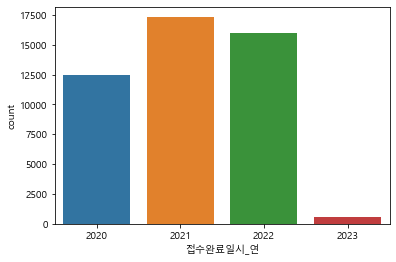

In [17]:
sns.countplot(data=voice_fishing, x='접수완료일시_연')

<AxesSubplot:xlabel='접수완료일시_월', ylabel='count'>

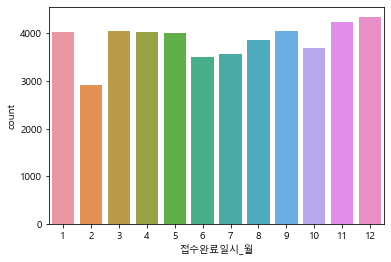

In [18]:
sns.countplot(data=voice_fishing, x='접수완료일시_월')


<AxesSubplot:xlabel='접수완료일시_일', ylabel='count'>

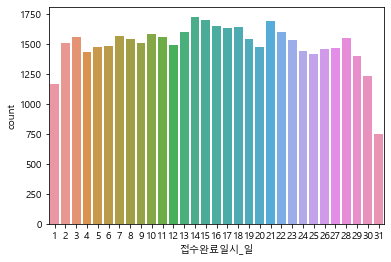

In [19]:
sns.countplot(data=voice_fishing, x='접수완료일시_일')


<AxesSubplot:xlabel='접수완료일시_요일', ylabel='count'>

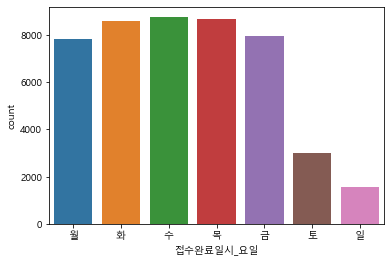

In [20]:
sns.countplot(data=voice_fishing, x='접수완료일시_요일', order=[
              '월', '화', '수', '목', '금', '토', '일'])


<AxesSubplot:xlabel='접수완료일시_시간', ylabel='count'>

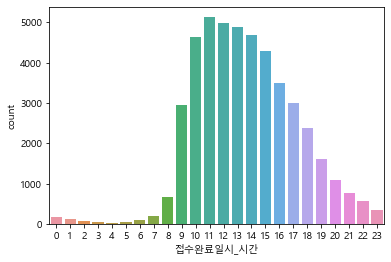

In [21]:
sns.countplot(data=voice_fishing, x='접수완료일시_시간')


#### 보이스피싱 피해장소 folium에 찍어보기

In [22]:
import folium
m = folium.Map(location=[36.6, 126.978426],
               zoom_start=8, width=1000, height=700)
#m


In [23]:
voice_fishing_x = voice_fishing.loc[~voice_fishing['발생좌표X'].isna(
), '발생좌표X'].tolist()
voice_fishing_y = voice_fishing.loc[~voice_fishing['발생좌표X'].isna(
), '발생좌표Y'].tolist()


In [24]:
voice_fishing_y


[36.786898,
 36.47019614,
 36.395766,
 36.849074,
 36.802345,
 36.717605,
 36.813471,
 36.71373,
 36.414901,
 36.918228,
 36.77721,
 36.123187,
 36.810329,
 36.385379,
 36.472479,
 36.895029,
 36.372807,
 36.912711,
 36.744535,
 37.52058,
 36.484783,
 36.77242,
 36.3705556,
 36.30065588,
 36.777356,
 36.89564,
 36.93131398,
 36.663677,
 36.712383,
 36.92729,
 36.89564,
 36.934115,
 36.158292,
 36.800665,
 36.19451385,
 36.600434,
 36.663677,
 36.60564414,
 36.568773,
 36.201674,
 36.353693,
 36.802186,
 36.53481,
 36.802186,
 36.646371,
 36.74762,
 36.604826,
 36.819842,
 36.349979,
 36.813606,
 36.77761,
 36.785245,
 36.477785,
 36.822064,
 36.789355,
 36.782471,
 36.894261,
 36.378741,
 36.79601715,
 36.46447,
 36.807163,
 36.81005848,
 36.46263,
 36.819439,
 36.34168467,
 36.36079853,
 36.3406107,
 36.84253,
 36.91692627,
 36.601073,
 36.27226678,
 36.51278,
 36.3406107,
 36.77343293,
 36.513288,
 36.91004,
 36.65695128,
 36.855489,
 37.626831,
 36.809211,
 36.917011,
 36.743002,
 3

In [25]:
for x, y in zip(voice_fishing_x, voice_fishing_y):
    folium.Circle(
        radius=7,
        location=[y, x]
    ).add_to(m)


In [26]:
#m


#### 일자별 보이스피싱 신고 파악하기

In [27]:
voice_fishing

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소,접수완료일시_연,접수완료일시_월,접수완료일시_일,접수완료일시_요일,접수완료일시_시간
0,충남청,2020-12-01 15:06:38,충남청,종결요청,보이스피싱,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN,NaN,2020,12,1,화,15
1,충남청,2020-12-01 14:53:20,충남청,종결요청,보이스피싱,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN,NaN,2020,12,1,화,14
2,충남청,2020-12-01 11:15:43,충남청,종결요청,보이스피싱,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN,NaN,2020,12,1,화,11
3,충남청,2020-12-01 13:08:09,충남청,종결요청,보이스피싱,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN,NaN,2020,12,1,화,13
4,충남청,2020-12-01 14:00:07,충남청,종결요청,보이스피싱,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN,NaN,2020,12,1,화,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46263,충남청,2020-11-20 13:25:41,충남청,종결요청,보이스피싱,여성,NaN,NaN,NaN,,,2020,11,20,금,13
46264,충남청,2020-11-20 13:41:02,충남청,종결요청,보이스피싱,여성,NaN,126.933050,36.770739,,충청남도 아산시 신창면 읍내리(신창면) 646(V 순천향대학교),2020,11,20,금,13
46265,대전청,2020-11-20 14:45:18,대전청,종결요청,보이스피싱,여성,NaN,127.427443,36.442072,,대전광역시 대덕구 덕암동(행정:덕암동) 14-4,2020,11,20,금,14
46266,충남청,2020-11-20 11:31:12,충남청,종결요청,보이스피싱,여성,NaN,126.516425,36.306058,,충청남도 보령시 신흑동(행정:대천5동) 1983,2020,11,20,금,11


In [28]:
voice_fishing['접수완료일시_연월일'] = voice_fishing['접수완료일시'].dt.date

In [29]:
voice_fishing_by_day = voice_fishing.groupby('접수완료일시_연월일').count()['접수완료일시']
voice_fishing_by_day

접수완료일시_연월일
2020-01-02    29
2020-01-03    31
2020-01-04     6
2020-01-05     2
2020-01-06    14
              ..
2023-01-14    12
2023-01-15     9
2023-01-16    23
2023-01-17    23
2023-01-18    13
Name: 접수완료일시, Length: 1094, dtype: int64

In [30]:
voice_fishing_by_day.shape

(1094,)

In [31]:
sns.reset_defaults()

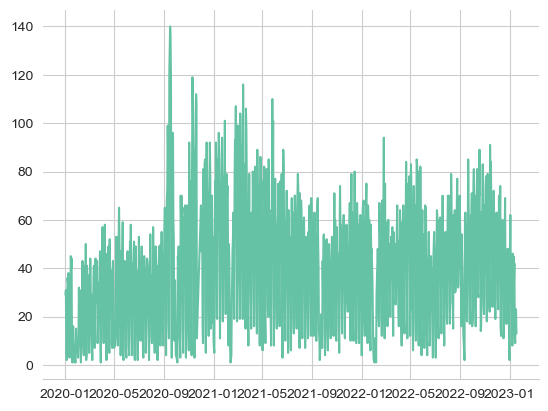

In [33]:
# sns.set_context('talk')
sns.set_palette('Set2')
sns.set_style('whitegrid')

fig, axs = plt.subplots()
plt.plot(voice_fishing_by_day.index, voice_fishing_by_day.values)

axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)


#### Train_test_split

In [37]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [45]:
training_set = voice_fishing_by_day.iloc[:800].values.reshape(-1, 1)
test_set = voice_fishing_by_day.iloc[800:].values.reshape(-1, 1)

In [72]:
# Feature Scaling

sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output

X_train = []

y_train = []

for i in range(60, 800):

   X_train.append(training_set_scaled[i-60:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


(740, 60)


In [50]:
X_train.shape


(740, 60, 1)

In [52]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train.shape[1], 1)))

model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units=50, return_sequences=True))

model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units=50, return_sequences=True))

model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units=50))

model.add(Dropout(0.2))

# Adding the output layer

model.add(Dense(units=1))

# Compiling the RNN

model.compile(optimizer= 'adam', loss= 'mean_squared_error')

# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 18s 125ms/step - loss: 0.0477
Epoch 2/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0348
Epoch 3/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0361
Epoch 4/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0356
Epoch 5/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0358
Epoch 6/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0353
Epoch 7/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0353
Epoch 8/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0359
Epoch 9/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0343
Epoch 10/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0335
Epoch 11/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0340
Epoch 12/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0344
Epoch 13/100
24/24 [===

In [86]:
dataset_train = voice_fishing_by_day.iloc[:800]

dataset_test = voice_fishing_by_day.iloc[800:]

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 294):

   X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)


(234, 60, 1)


In [87]:
predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 23ms/step


ValueError: x and y must have same first dimension, but have shapes (294,) and (234, 1)

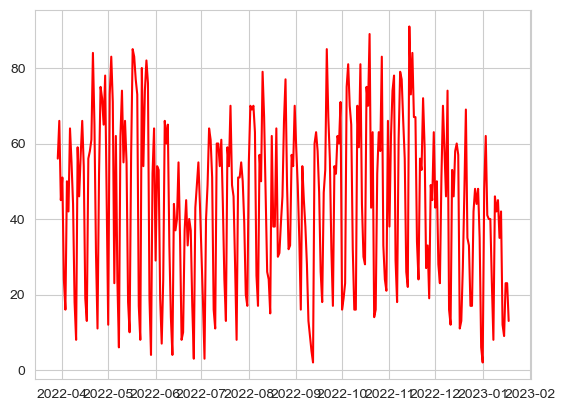

In [90]:
# Visualising the results

plt.plot(dataset_test.index, dataset_test.values, color='red')

plt.plot(dataset_test.index, predicted_stock_price,
         color='blue', label='Predicted TESLA Stock Price')

plt.xticks(np.arange(0, 459, 50))

plt.legend()

plt.show()
